Instalando a biblioteca MiniSom

In [1]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=6f9555121df965518db1f5870a3383ccaf9dcb915cd638f5b147115afd87798e
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


Bibliotecas utilizadas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from minisom import MiniSom
from matplotlib.gridspec import GridSpec

Carregando dados

In [3]:
pzt = pd.read_csv('PCA20.csv')
pzt = pzt.values

Criando o SOM

In [34]:
som = MiniSom(x= 200, y = 200, input_len = 20, sigma = 15, learning_rate=0.5, neighborhood_function='gaussian', topology='rectangular')

Iniciando os pesos das conexões

In [35]:
som.random_weights_init(pzt)

Iniciando o treinamento

In [36]:
print("Training...")
som.train(pzt, 10000, verbose=True)
print("\n...ready!")

Training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 2.012357164614051

...ready!


Plotando o mapa

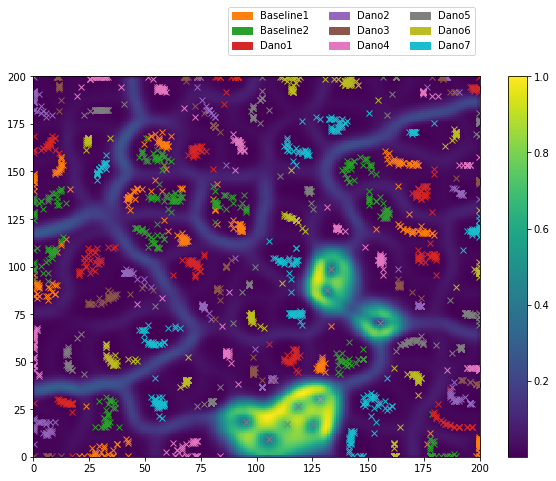

In [37]:
markers = ['x','+','o','D','H','b','c','*','s']
colors = ['C1','C2','C3','C4','C5','C6','C7','C8','C9']

C1_patch = mpatches.Patch(color='C1', label='Baseline1')
C2_patch = mpatches.Patch(color='C2', label='Baseline2')
C3_patch = mpatches.Patch(color='C3', label='Dano1')
C4_patch = mpatches.Patch(color='C4', label='Dano2')
C5_patch = mpatches.Patch(color='C5', label='Dano3')
C6_patch = mpatches.Patch(color='C6', label='Dano4')
C7_patch = mpatches.Patch(color='C7', label='Dano5')
C8_patch = mpatches.Patch(color='C8', label='Dano6')
C9_patch = mpatches.Patch(color='C9', label='Dano7')

plt.figure(figsize=(10,7))
plt.pcolor(som.distance_map().T)
plt.colorbar()
    
plt.axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
plt.legend(handles=[C1_patch,C2_patch,C3_patch,C4_patch,C5_patch,C6_patch,C7_patch,C8_patch,C9_patch], loc='center right', ncol=3, bbox_to_anchor=(1, 1.12))

for i, x in enumerate(pzt):

    y = som.winner(x)

    if i <= 330:
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C1', markeredgecolor = 'C1', label='Baseline1')
    elif(330 < i <= 660):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C2', markeredgecolor = 'C2', label='Baseline2')
    elif(660 < i <= 990):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C3', markeredgecolor = 'C3', label='Dano1')
    elif(990 < i <= 1320):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C4', markeredgecolor = 'C4', label='Dano2')
    elif(1320 < i <= 1650):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C5', markeredgecolor = 'C5', label='Dano3')
    elif(1650 < i <= 1980):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C6', markeredgecolor = 'C6', label='Dano4')
    elif(1980 < i <= 2310):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C7', markeredgecolor = 'C7', label='Dano5')
    elif(2310 < i <= 2640):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C8', markeredgecolor = 'C8', label='Dano6')
    elif(2640 < i <= 2970):
        z = plt.plot(y[0] + 0.5, y[1] + 0.5, 'x', markerfacecolor='C9', markeredgecolor = 'C9', label='Dano7')
plt.show()

Erro topologico

In [38]:
som.topographic_error(pzt)

0.04141414141414142